In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# библиотека для машинного обучения sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### <center> Задание по линейной регрессии
Данный набор данных - более чистая версия данных из лабораторной работы по очистке данных. Теперь будем строить модель линейной регрессии для прогнозирования стоимости жилья (столбец **price_doc**) в зависимости от всех остальных факторов.

Этапы:
1. Построить корреляционную матрицу, чтобы найти, какой признак больше всего коррелирует с ценой.
2. Постройте однофакторную модель регрессии по этому признаку. Сделайте анализ остатков модели, посмотрите на качество метрик (R-квадрат и MAE), сделайте выводы о качестве модели (написать комментарий).
3. Постройте многофакторную модель регрессии по всем признакам. Сделайте анализ остатков модели, посмотрите на качество метрик, сделайте выводы о качестве модели.
4. Поочередно выкидывайте признаки из модели, чтобы оценить, какие из них являются важными, а какие - нет. Сделайте выводы о важности признаков.

Далее, попробуем использовать подход разбиения данных на обучающую и тестовую выборки. Выберите признаки, с которыми получилась лучшая модель. Для этой модели необходимо сделать следующее:
5. Разбейте данные на обучающую и тестовую выборки, обучите модель, выведите метрики качества, сравните метрики на трейне и тесте
6. Если до сих пор вы не очищали даные от аномалий и выбросов, сделайте это и сново перестройте модель. Как это повлияло на качество модели?


In [2]:
data = pd.read_csv('regression_data.csv')
data.head()

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
0,8059,2013-05-21,11,11.0,2.0,3.0,5.0,2.0,1907,1.0,12.0,75377,Hamovniki,2750000,55485.2,14983.92,47.35,40.77,2.31,76.37
1,8138,2013-05-25,53,30.0,10.0,3.0,16.0,1.0,1980,2.0,8.0,68630,Lianozovo,9000000,55485.2,14983.92,47.35,40.77,2.31,76.37
2,8156,2013-05-27,77,41.0,2.0,1.0,17.0,6.0,2014,3.0,12.0,9553,Poselenie Voskresenskoe,7011550,55485.2,14983.92,47.35,40.77,2.31,76.37
3,8157,2013-05-27,45,27.0,6.0,3.0,9.0,1.0,1970,2.0,6.0,78616,Severnoe Butovo,7100000,55485.2,14983.92,47.35,40.77,2.31,76.37
4,8258,2013-05-30,74,46.0,12.0,3.0,24.0,1.0,2004,3.0,9.0,27992,Juzhnoe Medvedkovo,12100000,55485.2,14983.92,47.35,40.77,2.31,76.37


In [3]:
data.describe()

,id,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
count,14816.000000,14816.000000,14816.000000,14816.000000,14816.000000,14816.000000,14816.000000,1.481600e+04,14816.000000,14816.000000,1.481600e+04,1.481600e+04,14816.000000,14816.000000,14816.000000,14816.000000,14816.000000,14816.000000
mean,20125.711933,53.282127,34.388229,7.092198,2.253105,12.364133,1.926498,3.258545e+03,1.944789,7.645721,1.696573e+05,7.760501e+06,60652.285070,16412.151532,50.136764,41.913624,33.606733,76.650951
std,6012.574867,21.493609,64.319314,5.055868,0.832388,6.112946,1.523468,1.647223e+05,0.871448,29.193922,3.190805e+05,5.050117e+06,2673.449334,1009.048696,1.633962,1.117839,1.285190,0.134739
min,8059.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,2.546000e+03,1.000000e+05,55485.200000,14983.920000,46.560000,38.910000,2.310000,76.370000
25%,15006.500000,38.000000,20.000000,3.000000,2.000000,9.000000,1.000000,1.967000e+03,1.000000,5.000000,5.740500e+04,5.300000e+06,61208.000000,15730.810000,49.120000,41.180000,33.060000,76.700000
50%,20250.500000,48.000000,30.000000,6.000000,2.000000,12.000000,1.000000,1.979000e+03,2.000000,7.000000,8.997100e+04,6.850000e+06,61208.000000,16205.250000,49.890000,41.960000,33.670000,76.700000
75%,25363.250000,63.000000,43.000000,10.000000,3.000000,17.000000,2.000000,2.004000e+03,3.000000,9.000000,1.292070e+05,9.100000e+06,61208.000000,16648.700000,51.410000,42.640000,34.520000,76.700000
max,30473.000000,637.000000,7478.000000,77.000000,33.000000,57.000000,6.000000,2.005201e+07,19.000000,2014.000000,1.716730e+06,9.512250e+07,64310.000000,18745.280000,53.210000,43.850000,35.370000,76.770000


**1. Построить корреляционную матрицу, чтобы найти, какой признак больше всего коррелирует с ценой.**

In [4]:
data.corr()

,id,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
id,1.000000,0.047572,0.007082,0.020489,-0.105563,0.035155,0.021266,-0.013847,0.017088,-0.002109,-0.011505,0.072959,0.820880,0.896189,0.609556,-0.050312,-0.193437,0.756910
full_sq,0.047572,1.000000,0.249767,0.160430,-0.067906,0.210499,0.049657,-0.006277,0.708513,0.039477,-0.022089,0.634608,0.052252,0.060446,0.016030,-0.035652,-0.040892,0.041105
life_sq,0.007082,0.249767,1.000000,0.034202,-0.068710,0.044023,0.010075,-0.002417,0.181143,0.002197,-0.019616,0.137888,-0.001363,0.009860,0.001000,-0.004863,-0.006890,-0.005509
floor,0.020489,0.160430,0.034202,1.000000,-0.069236,0.537254,0.031061,0.001479,0.002473,0.007214,-0.020477,0.137385,0.023191,0.024981,0.002392,-0.021423,-0.021676,0.019126
state,-0.105563,-0.067906,-0.068710,-0.069236,1.000000,-0.026325,-0.084279,0.304078,0.065234,0.024303,0.072079,0.106716,-0.097458,-0.108998,-0.049222,0.047281,0.054033,-0.086235
max_floor,0.035155,0.210499,0.044023,0.537254,-0.026325,1.000000,0.077608,-0.000291,-0.004804,0.038296,0.000004,0.161406,0.032826,0.042137,0.008058,-0.029636,-0.032839,0.026313
material,0.021266,0.049657,0.010075,0.031061,-0.084279,0.077608,1.000000,-0.004831,-0.041341,0.034055,0.019234,0.060954,0.006922,0.026442,0.009165,-0.013824,-0.016946,-0.000067
build_year,-0.013847,-0.006277,-0.002417,0.001479,0.304078,-0.000291,-0.004831,1.000000,-0.008819,0.000478,-0.000876,0.002159,-0.016022,-0.009669,-0.009700,0.003141,-0.002827,-0.017266
num_room,0.017088,0.708513,0.181143,0.002473,0.065234,-0.004804,-0.041341,-0.008819,1.000000,0.015373,-0.004929,0.472094,0.019586,0.028146,0.003765,-0.016515,-0.021919,0.011347
kitch_sq,-0.002109,0.039477,0.002197,0.007214,0.024303,0.038296,0.034055,0.000478,0.015373,1.000000,-0.000167,0.026619,-0.004369,0.003220,0.001304,-0.002743,-0.001924,-0.007706


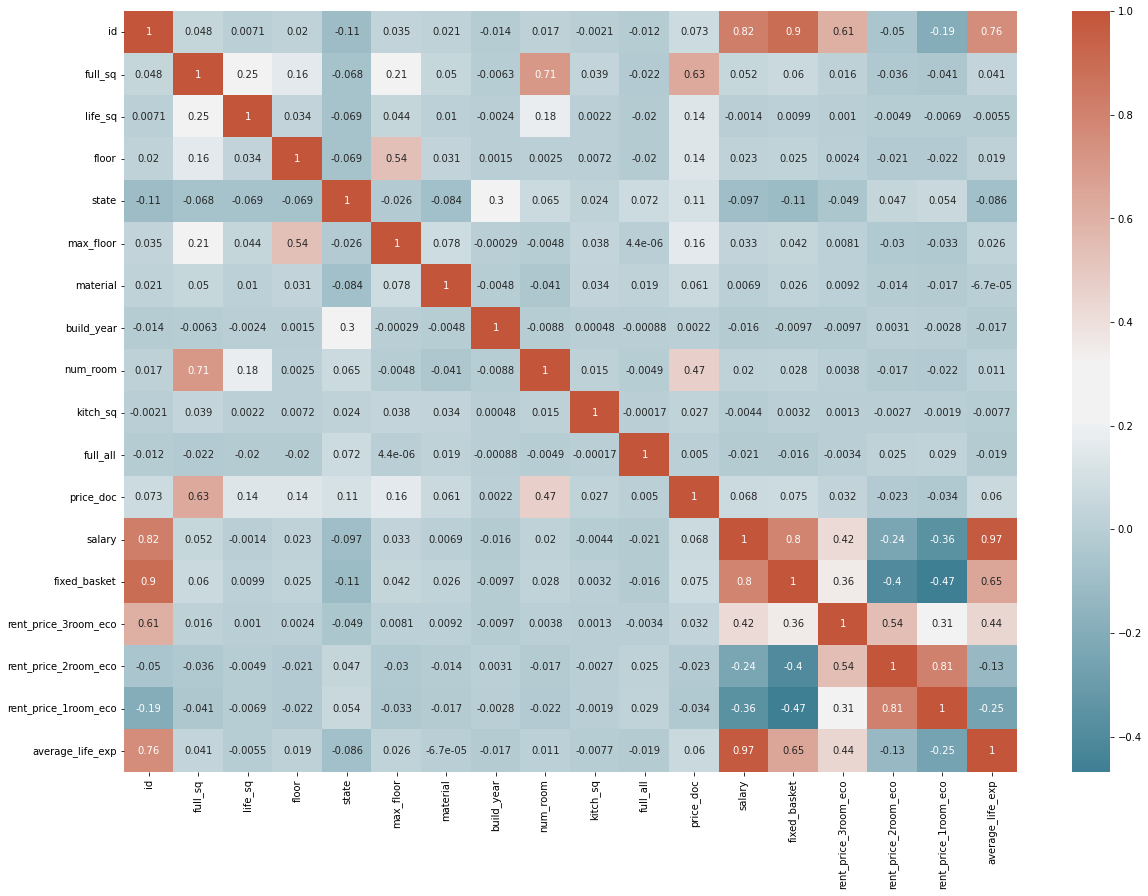

In [5]:
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
plt.subplots(figsize=(20, 14))
sns.heatmap(data.corr(),cmap=cmap, annot=True);

*Сильнее всего с ценой коррелирует фактор общей площади помещения - full_sq (0,63)*

**2. Постройте однофакторную модель регрессии по этому признаку. Сделайте анализ остатков модели, посмотрите на качество метрик (R-квадрат и MAE), сделайте выводы о качестве модели (написать комментарий).**

In [6]:
# Формируем X и y для построения модели
x = data[['full_sq']]
y = data['price_doc']

# Создаем объект модели
reg_model_1 = LinearRegression()

# Обучаем модель на данных, применяя метод fit()
reg_model_1.fit(x, y)

# Делаем предказание, применяя метод predict(), и сохраняем его в отдельную переменную
pred_1 = reg_model_1.predict(x)

# Метрики качества
print('R2: ', r2_score(y, pred_1))
print('Mean absolute error (MAE): ', mean_absolute_error(y, pred_1))

R2:  0.40272744877628297
Mean absolute error (MAE):  2427536.071947832


In [7]:
# Выведем коэффициент модели (k) и свободный член модели (b)
print('Коэффициент модели (k): ', reg_model_1.coef_)
print('Свободный член (сдвиг) модели (b): ', reg_model_1.intercept_)

Коэффициент модели (k):  [149106.90749413]
Свободный член (сдвиг) модели (b):  -184232.1583610978


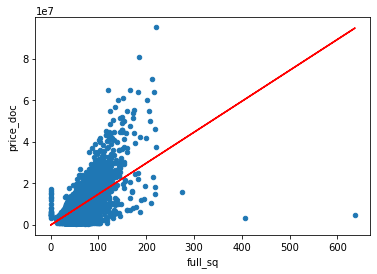

In [8]:
# Для оценки качества описания поведения данных моделью построим линию регрессии (тренд)
data.plot(x='full_sq', y='price_doc', kind='scatter')
plt.plot(data['full_sq'], pred_1, color='red');

*Как можно заметить, у модели есть ряд выбросов - точки, у которых площадь больше 250 м2 и точки, у которых цена больше 8000000 рублей, а также точки, у которых площадь около нуля, а цена доходит до 2х миллионов.*

In [9]:
# Для анализа остатков создадим новый датафрейм с колонками: Price - цена жил. площади, 
#Predictions - предсказания, Errors - ошибки модели
remains = pd.DataFrame({'Price': data['price_doc'],
                        'Predictions': pred_1,
                        'Errors': data['price_doc']-pred_1})
remains.head()

,Price,Predictions,Errors
0,2750000,1.455944e+06,1.294056e+06
1,9000000,7.718434e+06,1.281566e+06
2,7011550,1.129700e+07,-4.285450e+06
3,7100000,6.525579e+06,5.744213e+05
4,12100000,1.084968e+07,1.250321e+06


Для наглядности построим диаграмму рассеяния ошибок:

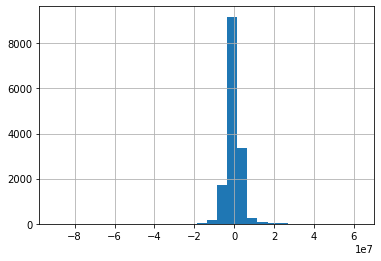

In [10]:
remains['Errors'].hist(bins=30)

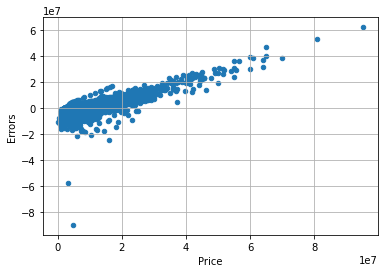

In [11]:
remains.plot(x='Price', y='Errors', kind='scatter', grid=True)

In [12]:
# Не уверен, что верно использовал

mean_absolute_percentage_error(remains['Price'], remains['Predictions'])

0.602601523170402

*Анализируя критерии качества модели, можно сделать вывод, что модель является не самой удачной - низкий показатель R^2 (даже меньше половины регрессии объяснено) + MAE имеет довольно большое значение. Также был посчитан показатель MAPE, который также довольно высок.*



---
Можно попытаться улучшить модель, удалив выбросы. Возвращаясь к диаграмме рассеяния признака full_sq в зависимости от price_doc, были выделены следующие выброс - точки, у которых площадь больше 250 м2 и точки, у которых цена больше 8000000 рублей, а также точки, у которых площадь около нуля, а цена доходит до 2х миллионов.

---
*Включил в выбросы помещения с площадью меньше 10 кв.м, поскольку минимальное жилое помещение по нормам СанПина - 8 кв.м + добавил 2 кв. м на кухню.*

In [13]:
# Находим выбросы, их индексы и удаляем
ind = data[(data['full_sq']>250)|(data['price_doc']>75000000)|(data['full_sq']<10)].index
clean_data = data.drop(ind, axis='index')

In [14]:
# Формируем X и y для построения модели на очищенных данных
x = clean_data[['full_sq']]
y = clean_data['price_doc']

# Создаем объект модели
reg_model_clean = LinearRegression()

# Обучаем модель на данных, применяя метод fit()
reg_model_clean.fit(x, y)

# Делаем предказание, применяя метод predict(), и сохраняем его в отдельную переменную
pred_clean = reg_model_clean.predict(x)

# Метрики качества
print('R2: ', r2_score(y, pred_clean))
print('Mean absolute error (MAE): ', mean_absolute_error(y, pred_clean))

R2:  0.4401879736282832
Mean absolute error (MAE):  2431980.821562141


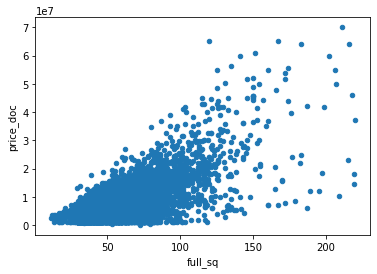

In [15]:
clean_data.plot(x='full_sq', y='price_doc', kind='scatter')

In [16]:
# Выведем коэффициент модели (k) и свободный член модели (b)
print('Коэффициент модели (k): ', reg_model_clean.coef_)
print('Свободный член (сдвиг) модели (b): ', reg_model_clean.intercept_)

Коэффициент модели (k):  [160588.12960721]
Свободный член (сдвиг) модели (b):  -805480.8918236354


Сравним линии тренда, проходящие через данные до очистки и после

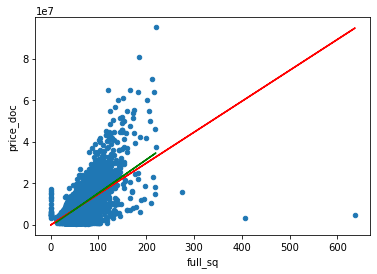

In [17]:
data.plot(x='full_sq', y='price_doc', kind='scatter')
plt.plot(data['full_sq'], pred_1, color='red');
plt.plot(clean_data['full_sq'], pred_clean, color='green');

In [18]:
# Для анализа остатков создадим новый датафрейм с колонками: Price - цена жил. площади, 
#Predictions - предсказания, Errors - ошибки модели
remains_clean = pd.DataFrame({'Price': clean_data['price_doc'],
                              'Predictions': pred_clean,
                              'Errors': clean_data['price_doc']-pred_clean})
remains_clean.head()

,Price,Predictions,Errors
0,2750000,9.609885e+05,1.789011e+06
1,9000000,7.705690e+06,1.294310e+06
2,7011550,1.155981e+07,-4.548255e+06
3,7100000,6.420985e+06,6.790151e+05
4,12100000,1.107804e+07,1.021959e+06


Сравним гистограммы распределения остатков

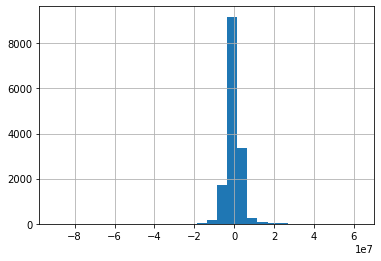

In [19]:
# До очистки
remains['Errors'].hist(bins=30)

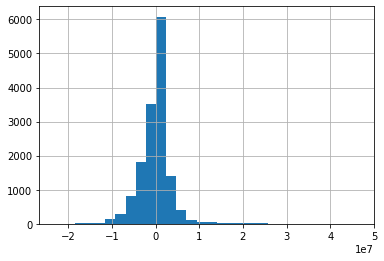

In [20]:
# После очистки
remains_clean['Errors'].hist(bins=30)

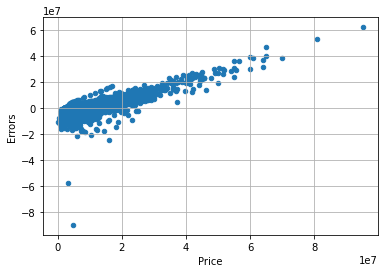

In [21]:
# До очистки
remains.plot(x='Price', y='Errors', kind='scatter', grid=True)

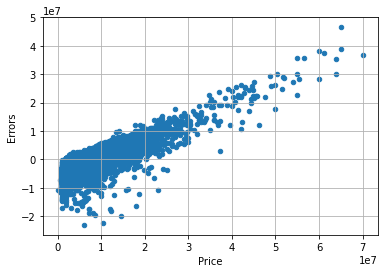

In [22]:
# После очистки
remains_clean.plot(x='Price', y='Errors', kind='scatter', grid=True)

In [23]:
mean_absolute_percentage_error(remains_clean['Price'], remains_clean['Predictions'])

0.6023802030636859

*В результате удаления выбросов не получилось построить модель значительно лучше. Хоть показатель R2 стал немного выше, но показаетль MAE у второй модели также немного увеличились. Но показатель MAPE незначительно уменьшился.*

**3. Постройте многофакторную модель регрессии по всем признакам. Сделайте анализ остатков модели, посмотрите на качество метрик, сделайте выводы о качестве модели.**

In [24]:
# Формируем X и y для построения модели
x = data[['full_sq', 'life_sq',	'floor',	'state',	'max_floor',	'material',	'build_year',	'num_room',	'kitch_sq',	'full_all',	'salary',	'fixed_basket',	'rent_price_3room_eco',	'rent_price_2room_eco',	'rent_price_1room_eco',	'average_life_exp']]
y = data['price_doc']

# Создаем объект модели
reg_model_multi = LinearRegression()

# Обучаем модель на данных, применяя метод fit()
reg_model_multi.fit(x, y)

# Делаем предказание, применяя метод predict(), и сохраняем его в отдельную переменную
pred_multi = reg_model_multi.predict(x)

# Метрики качества
print('R2: ', r2_score(y, pred_multi))
print('Mean absolute error (MAE): ', mean_absolute_error(y, pred_multi))

R2:  0.43491190047646633
Mean absolute error (MAE):  2305029.771740145


In [25]:
# Выведем коэффициенты модели и свободный член модели
print('Коэффициенты модели: ', reg_model_multi.coef_)
print('Свободный член (сдвиг) модели: ', reg_model_multi.intercept_)

Коэффициенты модели:  [ 1.45040134e+05 -9.16438607e+02  4.43469884e+04  1.04712482e+06
  6.24024220e+03  1.41792421e+05 -1.39094508e+00  1.51390418e+05
 -7.19679176e+02  1.07571579e-01 -3.47539383e+02  5.03200616e+02
 -3.10371375e+04  7.86953385e+04 -1.27287230e+04  6.21243840e+06]
Свободный член (сдвиг) модели:  -467946179.32874584


In [26]:
remains_multi = pd.DataFrame({'Price': data['price_doc'],
                              'Predictions': pred_multi,
                              'Errors': data['price_doc']-pred_multi})
remains_multi.head()

,Price,Predictions,Errors
0,2750000,1.742189e+06,1.007811e+06
1,9000000,8.251531e+06,7.484695e+05
2,7011550,1.013070e+07,-3.119149e+06
3,7100000,6.875417e+06,2.245834e+05
4,12100000,1.156759e+07,5.324079e+05


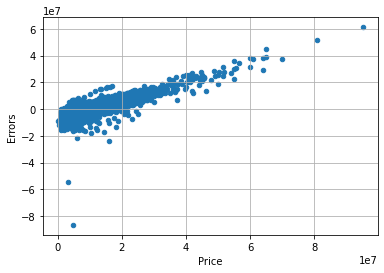

In [27]:
# Проверка остатков
remains_multi.plot(x='Price', y='Errors', kind='scatter', grid=True);

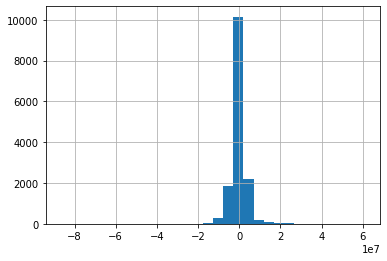

In [28]:
remains_multi['Errors'].hist(bins=30)

*Распределение остатков относительно близко к нормальному. Построенная модель не самая хорошая, если оценивать показатели качества модели.*

**4. Поочередно выкидывайте признаки из модели, чтобы оценить, какие из них являются важными, а какие - нет. Сделайте выводы о важности признаков.**

In [29]:
# Убираю из датафрейма поля id, timestamp (не нужно для анализа), sub_area (текстовый формат, не понятно, как он сможет повлиять на модель)
data_without_some_column = data.drop(columns = ['id', 'timestamp', 'sub_area'])

In [30]:
for col in x.columns[1:]:
    tmp = data_without_some_column.drop([col, 'price_doc'], axis='columns')
    print('Убрали признак: ', col)
    y_tmp = data['price_doc']
    x_tmp = sm.add_constant(tmp)
    model_tmp = LinearRegression() 
    model_tmp.fit(x_tmp, y_tmp)
    preds =  model_tmp.predict(x_tmp)
    print('R2: ', r2_score(y, preds)) 
    print('Mean absolute error (MAE): ', mean_absolute_error(y, preds))
    print('_'*50)

Убрали признак:  life_sq
R2:  0.4347846920338949
Mean absolute error (MAE):  2305180.7387019745
__________________________________________________
Убрали признак:  floor
R2:  0.4335246093340701
Mean absolute error (MAE):  2306595.2110737367
__________________________________________________
Убрали признак:  state
R2:  0.4095745731731283
Mean absolute error (MAE):  2428589.207136601
__________________________________________________
Убрали признак:  max_floor
R2:  0.4348736034569185
Mean absolute error (MAE):  2305234.5356461327
__________________________________________________
Убрали признак:  material
R2:  0.4331260901951961
Mean absolute error (MAE):  2304030.746590646
__________________________________________________
Убрали признак:  build_year
R2:  0.4330554262074763
Mean absolute error (MAE):  2309265.7108446625
__________________________________________________
Убрали признак:  num_room
R2:  0.4346015763858352
Mean absolute error (MAE):  2303286.2351111155
_____________________

*Вероятно есть какая-то ошибка, поскольку все коэффициенты получились +/- равносильными по оказанию влияния на переменную price_doc.*

Построим многофакторную модель на данных без выбросов

In [31]:
# Формируем X и y для построения модели
x = clean_data[['full_sq', 'life_sq',	'floor',	'state',	'max_floor',	'material',	'build_year',	'num_room',	'kitch_sq',	'full_all',	'salary',	'fixed_basket',	'rent_price_3room_eco',	'rent_price_2room_eco',	'rent_price_1room_eco',	'average_life_exp']]
y = clean_data['price_doc']

# Создаем объект модели
reg_model_multi_clean = LinearRegression()

# Обучаем модель на данных, применяя метод fit()
reg_model_multi_clean.fit(x, y)

# Делаем предказание, применяя метод predict() и сохраняем его в отдельную переменную
pred_multi_clean = reg_model_multi_clean.predict(x)

# Метрики качества
print('R2: ', r2_score(y, pred_multi_clean))
print('Mean absolute error (MAE): ', mean_absolute_error(y, pred_multi_clean))

R2:  0.4748840226546872
Mean absolute error (MAE):  2307903.375148324


In [32]:
# Выведем коэффициенты модели и свободный член модели
print('Коэффициенты модели: ', reg_model_multi_clean.coef_)
print('Свободный член (сдвиг) модели: ', reg_model_multi_clean.intercept_)

Коэффициенты модели:  [ 1.74290554e+05 -4.18909238e+02  4.05958042e+04  1.12596929e+06
 -1.14324034e+04  1.34469878e+05 -1.51275875e+00 -3.85893652e+05
 -1.24122379e+03  1.43949895e-01 -2.84525459e+02  4.56599373e+02
 -3.35650945e+04  8.19343981e+04 -1.52375699e+03  5.16253888e+06]
Свободный член (сдвиг) модели:  -391374848.72533286


In [33]:
remains_multi_clean = pd.DataFrame({'Price': clean_data['price_doc'],
                                    'Predictions': pred_multi_clean,
                                    'Errors': clean_data['price_doc']-pred_multi_clean})
remains_multi_clean.head()

,Price,Predictions,Errors
0,2750000,8.812232e+05,1.868777e+06
1,9000000,7.875997e+06,1.124003e+06
2,7011550,9.739160e+06,-2.727610e+06
3,7100000,6.404508e+06,6.954922e+05
4,12100000,1.112611e+07,9.738927e+05


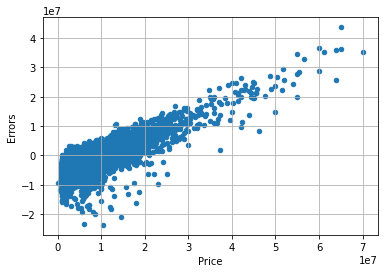

In [34]:
# Проверка остатков
remains_multi_clean.plot(x='Price', y='Errors', kind='scatter', grid=True);

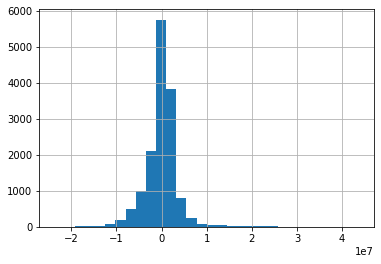

In [35]:
remains_multi_clean['Errors'].hist(bins=30)

*Распределение остатков относительно близко к нормальному. Построенная модель не самая хорошая, если оценивать показатели качества модели, но несколько лучше, чем модель, построенная на данных с выбросами.*

In [36]:
# Убираю из датафрейма поля id, timestamp (не нужно для анализа), sub_area (текстовый формат, не понятно, как он сможет повлиять на модель)
clean_data_without_some_column = clean_data.drop(columns = ['id', 'timestamp', 'sub_area'])

In [37]:
# Очищенные данные
for col in x.columns[1:]:
    tmp = clean_data_without_some_column.drop([col, 'price_doc'], axis='columns')
    print('Убрали признак: ', col)
    y_tmp = clean_data_without_some_column['price_doc']
    x_tmp = sm.add_constant(tmp)
    model_tmp = LinearRegression() 
    model_tmp.fit(x_tmp, y_tmp)
    preds =  model_tmp.predict(x_tmp)
    print('R2: ', r2_score(y, preds)) # reg_model.score
    print('Mean absolute error (MAE)', mean_absolute_error(y, preds))
    print('_'*50)

Убрали признак:  life_sq
R2:  0.4748564908387537
Mean absolute error (MAE) 2308126.1596303233
__________________________________________________
Убрали признак:  floor
R2:  0.47368641124493194
Mean absolute error (MAE) 2308939.777593563
__________________________________________________
Убрали признак:  state
R2:  0.4447974789272835
Mean absolute error (MAE) 2433593.247754351
__________________________________________________
Убрали признак:  max_floor
R2:  0.4747529572041116
Mean absolute error (MAE) 2307416.000530912
__________________________________________________
Убрали признак:  material
R2:  0.4732203703827018
Mean absolute error (MAE) 2309118.1366284457
__________________________________________________
Убрали признак:  build_year
R2:  0.47260875711300276
Mean absolute error (MAE) 2311021.410417673
__________________________________________________
Убрали признак:  num_room
R2:  0.47301466937550685
Mean absolute error (MAE) 2306586.2178792674
__________________________________

*В данной моделе наибольшее влияние оказывает переменная state, поскольку без неё R2 ниже, чем у других.*

**5. Разбейте данные на обучающую и тестовую выборки, обучите модель, выведите метрики качества, сравните метрики на трейне и тесте**

In [38]:
X = data[['full_sq']]
y = data['price_doc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

# Создаем объект модели
reg_model = LinearRegression()

# Обучаем модель на данных, применяя метод fit()
reg_model.fit(X_train, y_train)

# Делаем предказание, применяя метод predict(), и сохраняем его в отдельную переменную
pred_train = reg_model.predict(X_train)

# __Смотрим метрики качества__
print('Метрики на трейне:')
print('R2: ', r2_score(y_train, pred_train)) # reg_model.score
print('Mean absolute error (MAE)', mean_absolute_error(y_train, pred_train))

pred_test = reg_model.predict(X_test)

print('\n Метрики на тесте:')
print('R2: ', r2_score(y_test, pred_test)) 
print('Mean absolute error (MAE)', mean_absolute_error(y_test, pred_test))

Метрики на трейне:
R2:  0.38556343488378375
Mean absolute error (MAE) 2423356.606122777

 Метрики на тесте:
R2:  0.4418568677101732
Mean absolute error (MAE) 2400472.839331195


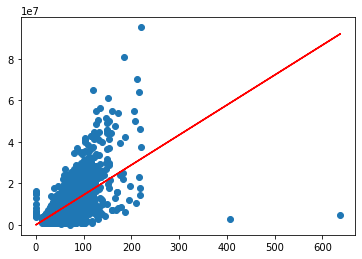

In [39]:
plt.scatter(X_train['full_sq'].values, y_train)
plt.plot(X_train['full_sq'], pred_train, color='red')

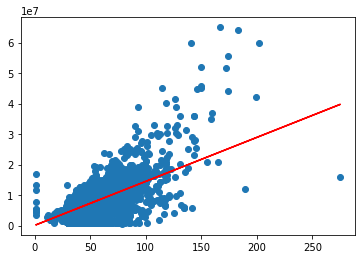

In [40]:
plt.scatter(X_test['full_sq'].values, y_test);
plt.plot(X_test['full_sq'], pred_test, color='red');

*Модель обучилась хорошо, метрики на тесте немного выше, чем на трейне.*

**6. Отчистить данные от аномалий и выбросов. Перестроить модель. Как это повлияло на качество модели?**

In [41]:
X = clean_data[['full_sq']]
y = clean_data['price_doc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

# Создаем объект модели
reg_model = LinearRegression()

# Обучаем модель на данных, применяя метод fit()
reg_model.fit(X_train, y_train)

# Делаем предказание, применяя метод predict(), и сохраняем его в отдельную переменную
pred_train = reg_model.predict(X_train)

# __Смотрим метрики качества__
print('Метрики на трейне: ')
print('R2: ', r2_score(y_train, pred_train)) # reg_model.score
print('Mean absolute error (MAE): ', mean_absolute_error(y_train, pred_train))

pred_test = reg_model.predict(X_test)

print('\n Метрики на тесте: ')
print('R2: ', r2_score(y_test, pred_test)) 
print('Mean absolute error (MAE): ', mean_absolute_error(y_test, pred_test))

Метрики на трейне: 
R2:  0.44736583864247337
Mean absolute error (MAE):  2417280.5632609464

 Метрики на тесте: 
R2:  0.42096597924788737
Mean absolute error (MAE):  2488324.4575716034


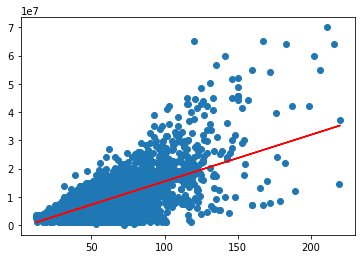

In [42]:
plt.scatter(X_train['full_sq'].values, y_train)
plt.plot(X_train['full_sq'], pred_train, color='red')

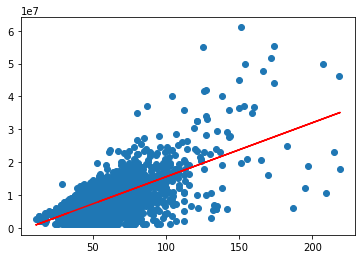

In [43]:
plt.scatter(X_test['full_sq'].values, y_test);
plt.plot(X_test['full_sq'], pred_test, color='red');

*Модель на данных без выбросов также обучилась хорошо - показатели качества на трейне и тесте имеют небольшие различия, но не критичные, чтобы считать модель недообученной или переученной.*